In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch

In [4]:
from trainer import Trainer
from pendulum import InvertedPendulum

# Task 1.1

## Parameters
Mass of the Cart (M): 1.0 kg

Mass of the Pendulum (m): 0.1 kg

Length of the Pendulum (l) : 1 m


In [5]:
pend = InvertedPendulum(
    mass_cart=1.0,      # M
    mass_pendulum=0.1,  # m
    length=1.0,         # l
    gravity=9.81,       # g
)

## Initial conditions

Initial Angle ($\theta$): $\pi/4$ rad

Initial Angular Velocity ($\dot{\theta}$): 0 rad/s

Initial Cart Position ($x$): 0 m

Initial Cart Velocity ($\dot{x}$): 0 m/s

Force ($F$): 10 $sin(t)$ 

In [6]:
# initial state
x, x_dot = 0, 0
theta, theta_dot = torch.pi/4, 0.0
initial_state = torch.tensor([x, x_dot, theta, theta_dot])

# time parameters
steps = 1000
t0 = 0
tn = 5
dt = tn/steps
t = torch.linspace(t0, tn, steps)

# external force
force = 10*torch.sin(t)

In [7]:
# simulate the system
states = pend.rollout(initial_state, force, dt)

<Figure size 640x480 with 0 Axes>

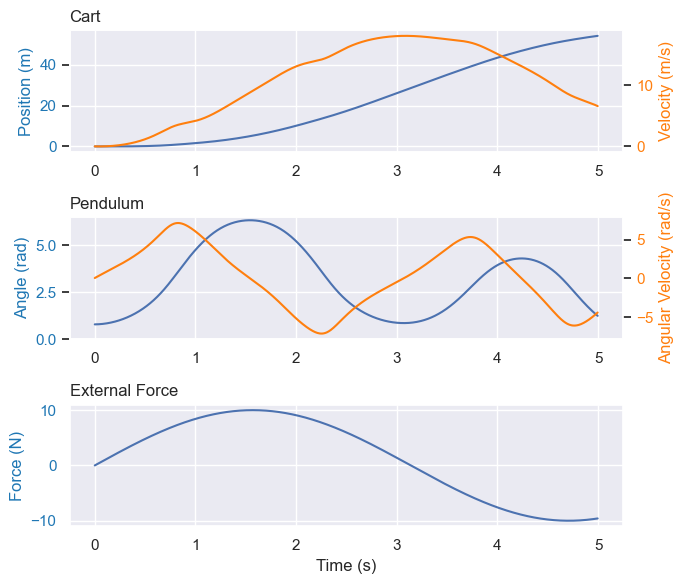

In [8]:
# plot the results
fig = pend.plot(states, force, dt)
fig.savefig('pendulum.pdf')

MovieWriter ffmpeg unavailable; using Pillow instead.


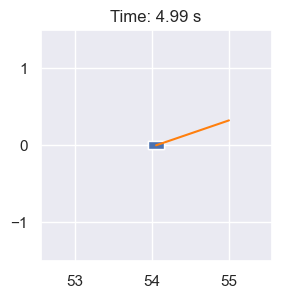

In [8]:
# animation
anim = pend.animate(states, dt);
anim.save('inverted_pendulum.gif', fps=30)

# Task 1.2

In [9]:
force_trainer = Trainer(pend)

In [10]:
# train the model
epochs = 500
hist = force_trainer.train(initial_state, dt, epochs, steps, lr=1e-2, step_size=75, gamma=0.5)

##### Epoch: 0, Loss: 1.434574007987976
##### Epoch: 10, Loss: 1.3624298572540283
##### Epoch: 20, Loss: 1.3595008850097656
##### Epoch: 30, Loss: 1.3542754650115967
##### Epoch: 40, Loss: 1.3434481620788574
##### Epoch: 50, Loss: 1.28879714012146
##### Epoch: 60, Loss: 0.8085179924964905
##### Epoch: 70, Loss: 0.3854360580444336
##### Epoch: 80, Loss: 0.23221376538276672
##### Epoch: 90, Loss: 0.13350892066955566
##### Epoch: 100, Loss: 0.08545409888029099
##### Epoch: 110, Loss: 0.04199551045894623
##### Epoch: 120, Loss: 0.029703043401241302
##### Epoch: 130, Loss: 0.025397997349500656
##### Epoch: 140, Loss: 0.02264534868299961
##### Epoch: 150, Loss: 0.021784014999866486
##### Epoch: 160, Loss: 0.01893843337893486
##### Epoch: 170, Loss: 0.01824606955051422
##### Epoch: 180, Loss: 0.01722753420472145
##### Epoch: 190, Loss: 0.016299284994602203
##### Epoch: 200, Loss: 0.015582655556499958
##### Epoch: 210, Loss: 0.014881093986332417
##### Epoch: 220, Loss: 0.014235042035579681
###

In [1]:
# plot the loss function
fig_loss = force_trainer.plot_loss_function(hist)
fig_loss.savefig('loss_function.pdf')

NameError: name 'force_trainer' is not defined

In [16]:
# test the model
test_states, force_nn = force_trainer.test(initial_state, dt, steps)

<Figure size 640x480 with 0 Axes>

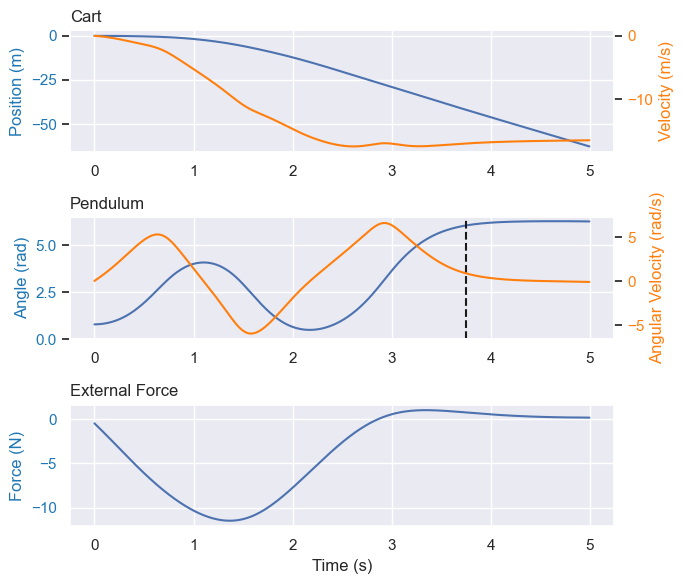

In [17]:
fig = pend.plot(test_states, force_nn, dt, line=True)
fig.savefig('pendulum_nn.pdf')

MovieWriter ffmpeg unavailable; using Pillow instead.


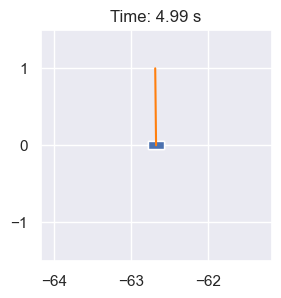

In [18]:
# animation
anim_nn = pend.animate(test_states, dt);
anim_nn.save('inverted_pendulum_nn.gif', fps=30)